# Credit Card Data Analysis

## Imports

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score

## Loading the data

In [2]:
data = pd.read_csv("../data/creditcard.csv")

In [3]:
data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
168352,119184.0,-0.431001,0.628940,0.481918,-0.683009,0.692538,-0.049572,0.945362,-0.113057,0.022162,...,0.000176,0.078090,-0.144701,-1.044943,-0.274184,0.241233,0.015030,0.134573,49.95,0
281404,170159.0,1.911598,-0.397526,-1.683219,0.286647,0.399064,-0.451795,0.388839,-0.329302,0.507502,...,-0.234857,-0.699689,0.052040,-1.018716,-0.080524,0.329485,-0.086798,-0.053118,114.63,0
177461,123186.0,-0.768039,1.130660,-0.463334,0.916303,1.139342,-0.536577,0.862166,0.268976,-1.195482,...,0.236941,0.750363,-0.287502,-0.349167,0.095383,-0.377306,0.321653,0.108392,17.15,0
206965,136460.0,-0.202643,0.169350,0.787248,0.542026,0.121509,0.734717,0.825230,0.269928,0.160434,...,-0.320273,-1.008964,0.543812,0.598775,-0.485116,-1.222595,0.044896,0.033527,141.46,0
188386,127948.0,0.097386,0.065546,-0.421620,0.411572,0.432518,-0.145775,1.192709,-0.285068,-1.823704,...,-0.205484,-0.225777,0.119507,0.566711,0.584187,-0.335758,-0.056490,-0.064424,143.11,0
26663,34192.0,1.400439,-1.114430,0.744150,-1.429048,-1.559701,-0.195904,-1.280330,0.058584,-2.020330,...,0.086836,0.689953,-0.023356,0.241603,0.335634,-0.033190,0.058928,0.013006,16.66,0
52146,45294.0,1.240337,-0.263627,0.296971,0.072139,-0.161764,0.646405,-0.630184,0.263597,0.467306,...,-0.056074,-0.276666,-0.181371,-1.381750,0.315380,0.480333,-0.023404,0.002540,36.46,0
25132,33522.0,1.475029,-0.418792,0.119788,-0.868046,-0.629771,-0.612559,-0.488869,-0.178024,-0.791767,...,-0.101276,-0.392400,-0.014129,-0.455331,0.429154,-0.367468,0.004784,0.011341,7.95,0
228758,145651.0,2.008261,0.293878,-2.782475,1.156520,1.439801,-0.069444,0.509074,-0.067640,0.093196,...,-0.051010,-0.080666,-0.139841,-0.508794,0.541802,-0.475506,-0.018168,-0.040483,33.61,0
178873,123823.0,1.454700,-1.382414,-0.818564,0.316899,-0.765423,-0.029929,-0.271318,-0.071703,1.407521,...,0.342938,0.570830,-0.116607,0.648201,-0.213181,0.068852,-0.040737,0.015058,300.00,0


In [4]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Exploratory Data Analysis

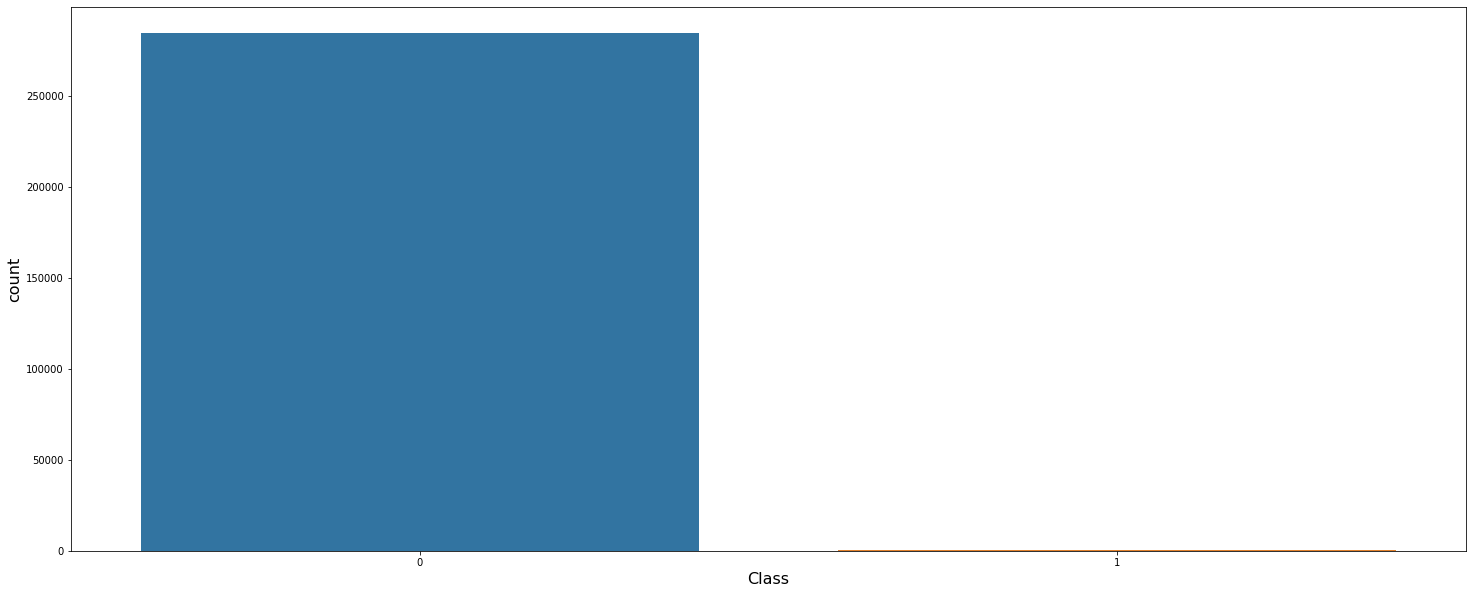

In [7]:
sns.countplot(data["Class"]);

We can see that the non-fraud transactions far outweight the non-fraud transactions. If we train a binary classification model without fixing this problem, the model will be completely biased.

### Correlation Matrix

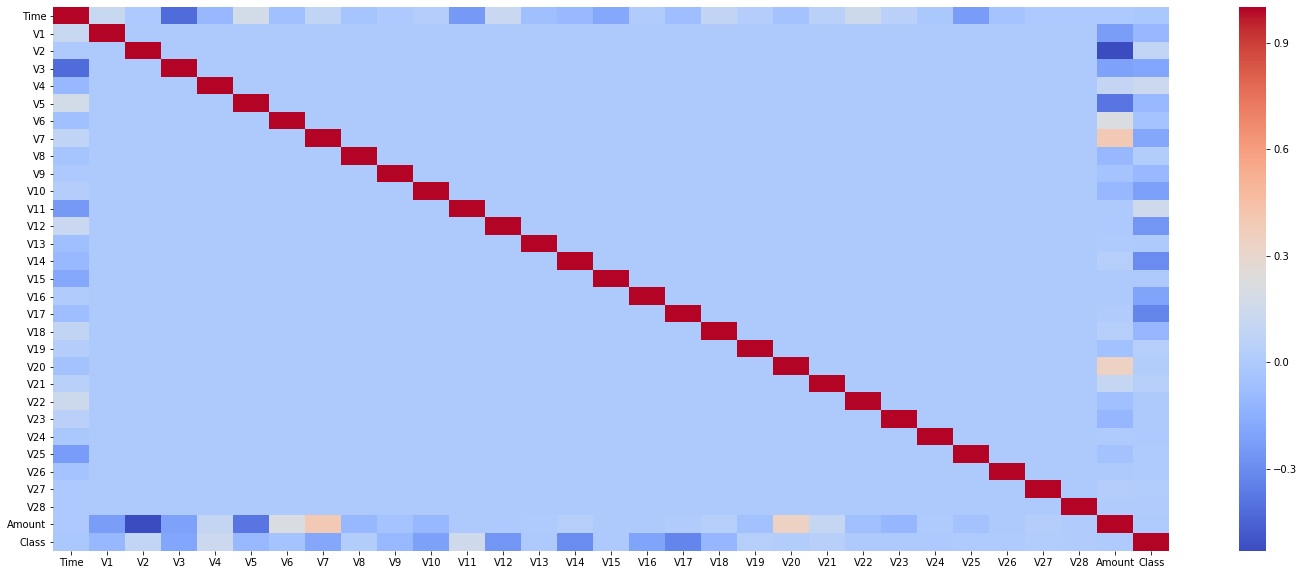

In [8]:
sns.heatmap(data.corr(), cmap='coolwarm');

Just from this correlation matrix, we can see that the variables have very little correlation with each other. This lack of correlation stems from the little amount of data given from the minority class. This will strongly affect the performance of a classification model. 

In [9]:
X = data.drop(["Class"], axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
lr_pred = lr.predict(X_test)

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9989607033510295


In [11]:
recall_score(lr_pred, y_test)

0.7294117647058823

So even though our accuracy is nearly perfect, this does not tell us as much as we think. A lot of this stems from the extreme bias within our data. We can see that our recall score is showing that we are not correctly identifying the fraudulent transactions sufficiently enough $(73\%)$.

Let us try to fix this with some resampling methods

## Exploratory Data Analysis

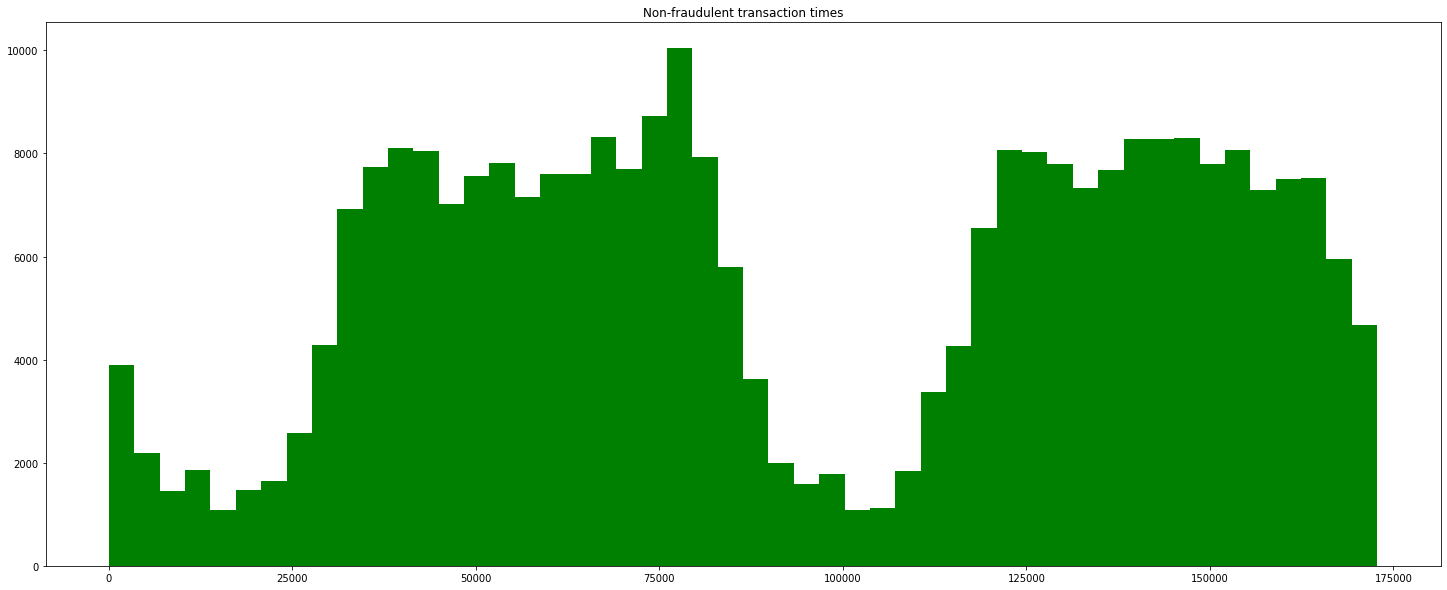

In [26]:
plt.hist(data.loc[data["Class"]==0, "Time"], bins=50, color="green");
plt.title("Non-fraudulent transaction times");

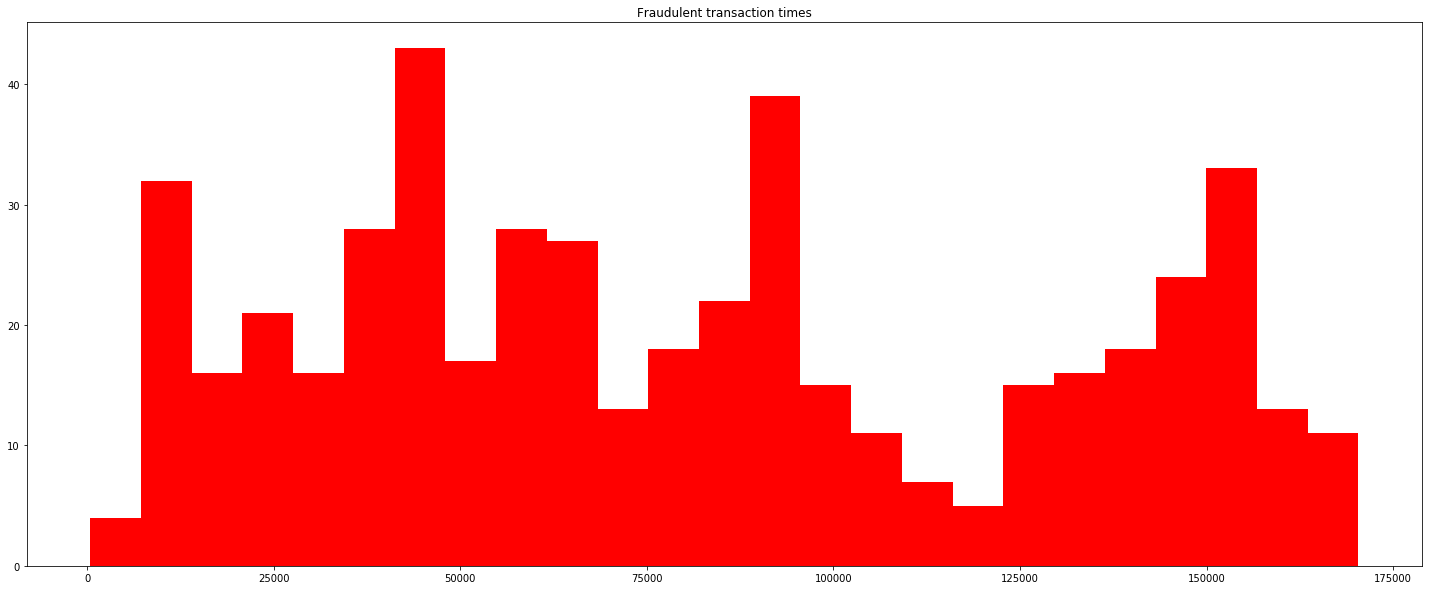

In [27]:
plt.hist(data.loc[data["Class"]==1, "Time"], bins=25, color="red");
plt.title("Fraudulent transaction times");

## Resampling

### Undersampling

Let us try *undersampling*, where we randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

In [13]:
data = data.sample(frac=1,random_state=4)
df_minority = data[data['Class'] == 1]
df_majority = data[data['Class'] == 0]

In [14]:
non_fraud = df_majority.sample(n=len(df_minority), random_state=42)

In [15]:
undersample_df = pd.concat([df_minority, non_fraud])

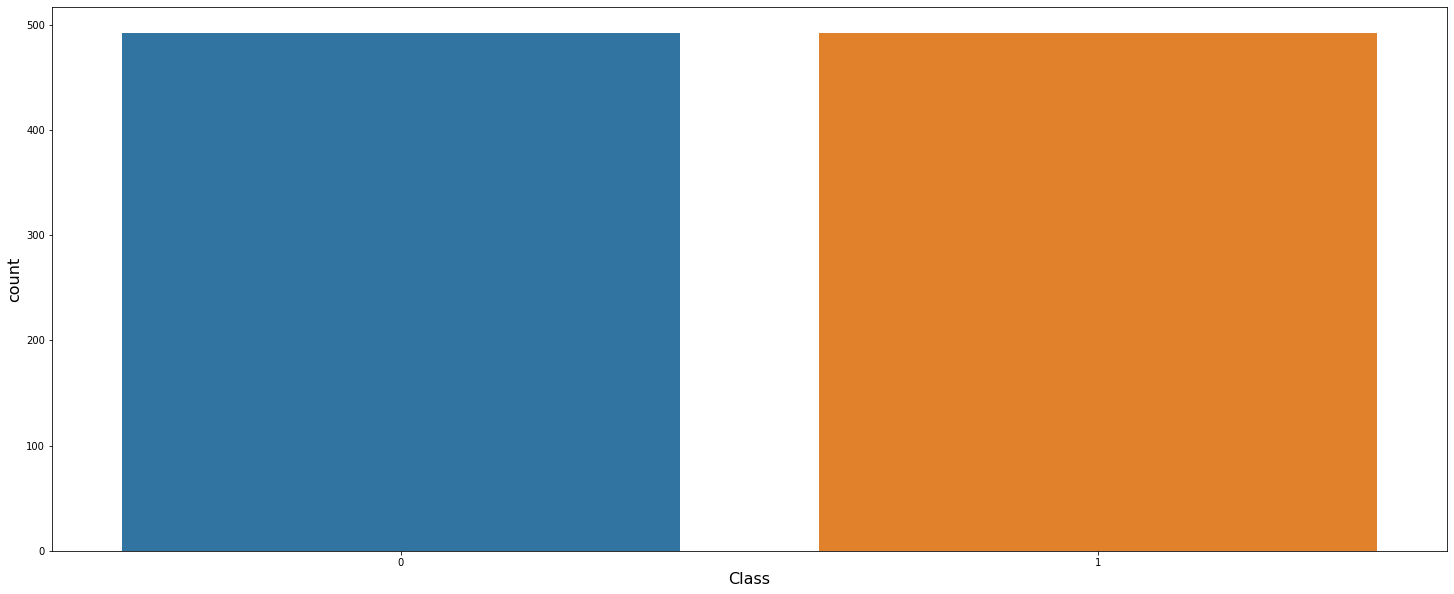

In [16]:
sns.countplot(data=undersample_df, x="Class");

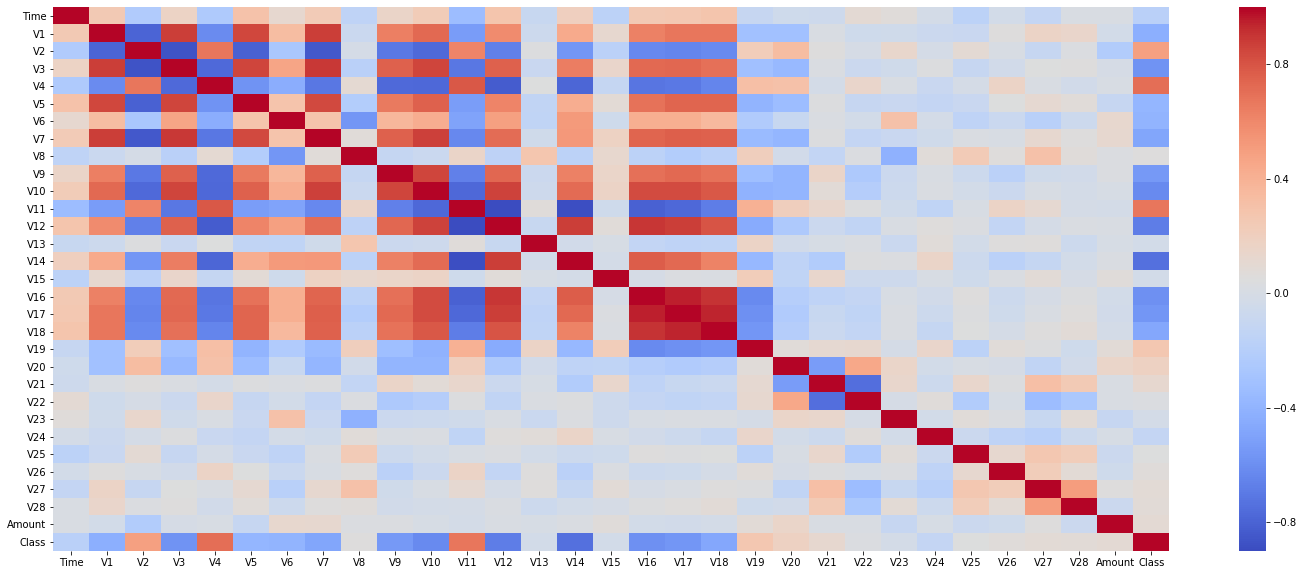

In [17]:
sns.heatmap(undersample_df.corr(), cmap="coolwarm");

We can see that with resampling, the correlation is much more obvious now. Originally most of the features showed no correlation with each other which would have affected the model's performance

### Oversampling

*Oversamplign* is when we randomly sample from the minority class without replacement until we have the same number of points as the majority class.

In [18]:
fraud = df_minority.sample(n=len(df_majority), random_state=42, replace=True)

oversample_df = pd.concat([fraud, df_majority])

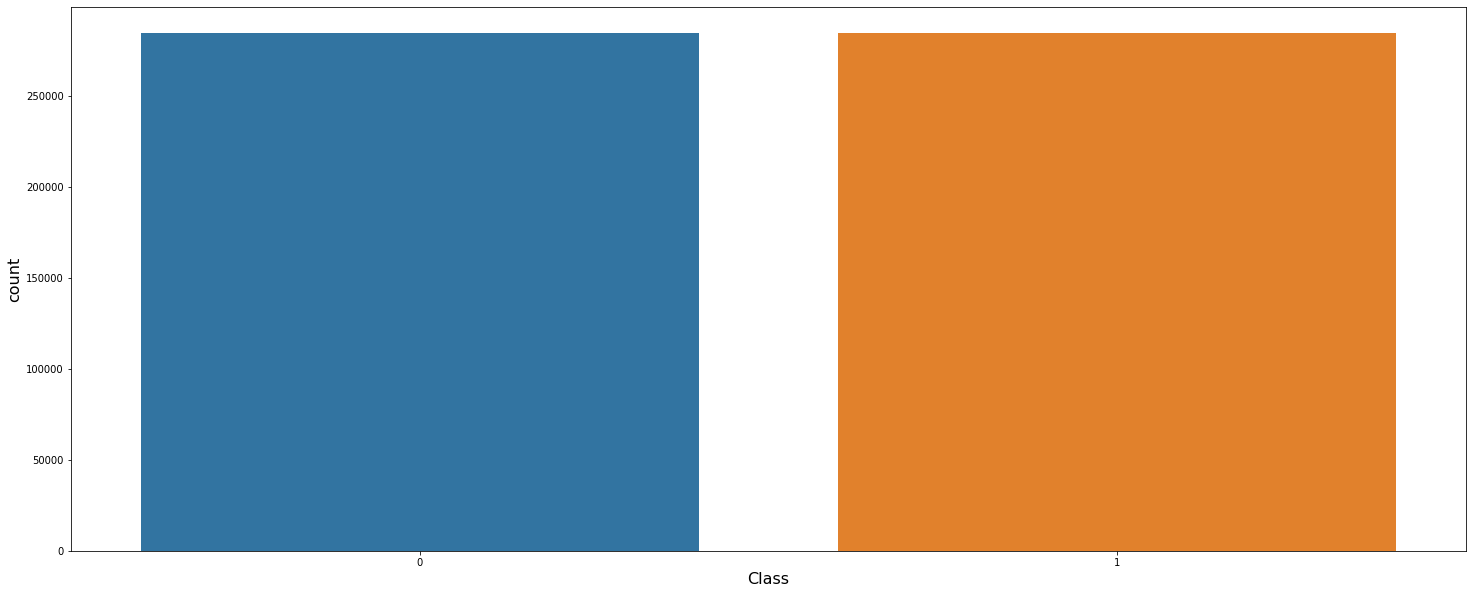

In [19]:
sns.countplot(oversample_df["Class"]);

### SMOTE

*SMOTE* is found to be the most common technique to oversample data. It looks at the feature space for the minority class data points and considers its $k$ nearest neighbours. 

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)

Using TensorFlow backend.


In [21]:
X = data.drop(["Class"], axis=1)
y = data["Class"]

In [22]:
oversampled_trainX, oversampled_trainY = sm.fit_sample(X, y)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train.columns = data.columns

X = oversampled_train.drop(["Class"], axis=1)
y = oversampled_train["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Classification methods

### Logistic Regression

In [23]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
lr_pred = lr.predict(X_test)

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9680777726191984


In [23]:
recall_score(lr_pred, y_test)

0.983525415856243

In [24]:
precision_score(lr_pred, y_test)

0.9521795340209662

We see that logistic regression has around a $97\%$ accuracy as well as a $98\%$ recall score. This shows that from all the fraudulent transactions in the data, we are correctly identifying $98\%$ of them. 

Furthermore, our precision score is also very good, showing that of the transactions the classifier are identifying as fraudulent, $98\%$ of them are correctly identified, and we are not misclassifying valid transactions as fraudulent, which would cause major inconvenience to clients.

### SVM

In [25]:
# svm = SVC(C=1.0, gamma=.01)
# svm.fit(X_train, y_train)
# print(svm.score(X_test, y_test))
# svm_pred = svm.predict(X_test)

In [26]:
# recall_score(svm_pred, y_test)

### KNN

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
knn_pred = knn.predict(X_test)

0.9607408657972115


In [28]:
recall_score(knn_pred, y_test)

0.9454807287350387

In [29]:
precision_score(knn_pred, y_test)

0.9779657682470981

We can see that with KNN, our accuracy and recall went down slightly, but our precision increased. 

### Random Forest

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
rf_pred = rf.predict(X_test)

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9998522770438526


In [31]:
recall_score(rf_pred, y_test)

0.9998032851381922

In [32]:
precision_score(rf_pred, y_test)

0.9999016328939603

WOW! It looks like random forest really does the best job in every single metric. While the accuracy is very high, it also has extremely high precision and recall score.

This means that we are correctly identifying almost all the fraudulent transactions. Furhermore, for the ones we are classifying as fraudulent, they are actually frauduelent

### Automating model selection

In [45]:
def best_model(X_train, X_test, y_train, y_test):
    models = {'Logistic Regression': LogisticRegression, 
              'KNN': KNeighborsClassifier, 
              'Linear Discriminant Analysis': LinearDiscriminantAnalysis, 
              'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis, 
              'Ada Boost': AdaBoostClassifier, 
              'Gaussian Naive Bayes': GaussianNB,
              'Random Forest': RandomForestClassifier}
    
    results = []
    for name, model in models.items():
        lst = []
        lst.append(name)

        m = model()
        m.fit(X_train, y_train)
        score = m.score(X_test, y_test)
        lst.append(score)

        y_pred = m.predict(X_test)
        recall = recall_score(y_pred, y_test)
        precision = precision_score(y_pred, y_test)
        lst.append(recall)
        lst.append(precision)

        results.append(lst)

    results = pd.DataFrame(data=results, columns=["Model", "Accuracy", "Recall", "Precision"])

#     results.sort_values(by=["Recall", "Accuracy"], axis=1 , ascending=False)
    results.set_index(["Model"], inplace=True)
    return results

In [46]:
results = best_model(X_train, X_test, y_train, y_test)
results

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Accuracy,Recall,Precision
Model,,,
Logistic Regression,0.968078,0.983525,0.952180
KNN,0.960741,0.945481,0.977966
Linear Discriminant Analysis,0.933025,0.987550,0.877266
Quadratic Discriminant Analysis,0.964659,0.973754,0.955145
Ada Boost,0.980346,0.988189,0.972359
Gaussian Naive Bayes,0.868611,0.990266,0.744850
Random Forest,0.999866,0.999831,0.999902


We can see that Random Forests have the best performance in terms of accuracy, recall, and precision. Now we can implement a classifier that inherits the classification power of a random forest.